In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# !pip install matplotlib==3.5.1

In [3]:
matplotlib.__version__

'3.5.1'

In [4]:
def cal_cpx(cost, metric, category):
    metric = metric + 0.1
    result = cost / metric
    
    if category == "impr":
        result = result * 1000
        
    return result

In [5]:
data = pd.read_csv("./data/data_max_budget.csv")
data = data.drop("Unnamed: 0", axis=1)

data["CPM"] = data.apply(lambda x: cal_cpx(cost=x["AdvCost"], metric=x["Impression"], category="impr"), axis=1)

print(len(data))
print(data.columns)
data.head()

C:\Users\Artience\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


374762
Index(['index', 'Date', 'Campaign_IO', 'Platform', 'AdvCost', 'Impression',
       'Click', 'View50', 'CountryCode', 'Media', 'AdType', 'Product',
       'Device', 'Cycle', 'CPM'],
      dtype='object')


,index,Date,Campaign_IO,Platform,AdvCost,Impression,Click,View50,CountryCode,Media,AdType,Product,Device,Cycle,CPM
0,7097,2021-04-16,HQ-GMC_SIG_REF_DE_21_Q2_LGCNS_|DV-GDN|Cycle1|A...,DV360,18.091220,10818.0,8.0,0.0,DG,DV-GDN,Banner,REF,Mobile,Cycle1,1.672310
1,7098,2021-04-16,HQ-GMC_SIG_REF_DE_21_Q2_LGCNS_|DV-GDN|Cycle1|A...,DV360,0.055261,42.0,0.0,0.0,DG,DV-GDN,Banner,REF,Mobile,Cycle1,1.312613
2,7099,2021-04-16,HQ-GMC_SIG_REF_DE_21_Q2_LGCNS_|DV-GDN|Cycle1|A...,DV360,40.436098,24741.0,20.0,0.0,DG,DV-GDN,Banner,REF,Mobile,Cycle1,1.634369
3,7100,2021-04-16,HQ-GMC_SIG_REF_DE_21_Q2_LGCNS_|DV-GDN|Cycle1|A...,DV360,3.755665,2256.0,2.0,0.0,DG,DV-GDN,Banner,REF,Mobile,Cycle1,1.664671
4,7101,2021-04-16,HQ-GMC_SIG_REF_DE_21_Q2_LGCNS_|DV-GDN|Cycle1|A...,DV360,50.348337,30172.0,27.0,0.0,DG,DV-GDN,Banner,REF,Mobile,Cycle1,1.668705


In [6]:
data.CPM.describe()

count    374635.000000
mean          3.113274
std           4.370342
min           0.000000
25%           0.394051
50%           1.631386
75%           4.201545
max         109.090907
Name: CPM, dtype: float64

In [4]:
https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html

SyntaxError: invalid syntax (<ipython-input-4-3c9e5bc4fc72>, line 1)

In [91]:
pd.date_range('2014-10-10','2016-01-07', 
              freq='MS').strftime("%y-%m-%d").tolist()

['14-11-01',
 '14-12-01',
 '15-01-01',
 '15-02-01',
 '15-03-01',
 '15-04-01',
 '15-05-01',
 '15-06-01',
 '15-07-01',
 '15-08-01',
 '15-09-01',
 '15-10-01',
 '15-11-01',
 '15-12-01',
 '16-01-01']

In [94]:
datetime.strptime(xtick[0], "%y-%m%-d%")

TypeError: strptime() argument 1 must be str, not datetime.datetime

In [117]:
xtick[0].strftime("%y-%m-%d")

'21-04-16'

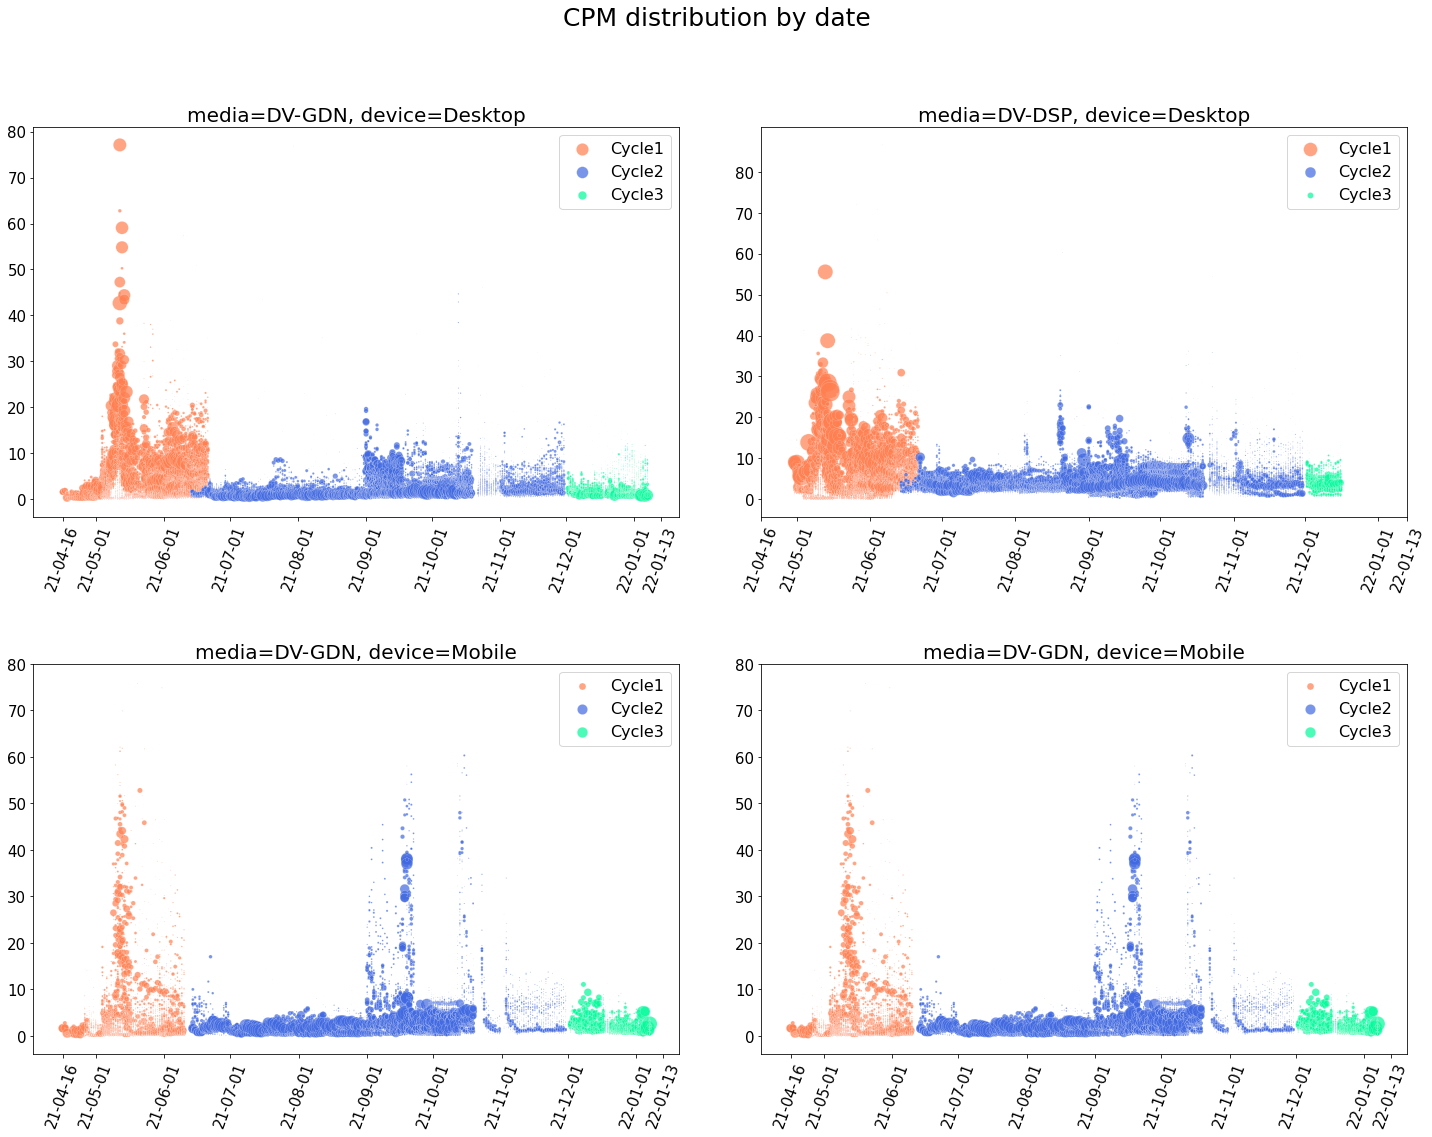

In [40]:
data_temp = data[data["AdType"]=="Banner"]
data_temp = data_temp[data_temp["CountryCode"] == "AP"]
data_temp = data_temp[data_temp["Media"].isin(["DV-GDN", "DV-DSP"])]

ax_hor_num = 2
ax_ver_num = 2
fig, axs = plt.subplots(ax_hor_num, ax_ver_num, figsize=(20, 15))

for ax_hor in range(ax_hor_num):
    for ax_ver in range(ax_ver_num):
        
        if ax_hor == ax_ver == 0:
            media = "DV-GDN"
            device = "Desktop"
        if (ax_hor == 1) & (ax_ver == 0):
            media = "DV-GDN"
            device = "Mobile"
        if (ax_hor == 0) & (ax_ver == 1):
            media = "DV-DSP"
            device = "Desktop"
        if ax_hor == ax_ver == 1:
            media = "DV-GDN"
            device = "Mobile"
        data_ = data[data["Media"] == media]
        data_ = data_[data_["Device"] == device]
        
        date = ["2021-04-16", "2021-05-01", "2021-06-01", "2021-07-01", "2021-08-01", "2021-09-01",
                "2021-10-01", "2021-11-01", "2021-12-01", "2022-01-01", "2022-01-13"]
        date = [datetime.strptime(e, "%Y-%m-%d") for e in date]

        xtick = date
        xlabel = [e.strftime("%y-%m-%d") for e in xtick]
        
        ytick = [0, 10, 20,30, 40, 50, 60, 70, 80]

        ax = axs[ax_hor][ax_ver]
        for cycle, color in [["Cycle1", "coral"], ["Cycle2", "royalblue"], ["Cycle3", "mediumspringgreen"]]:
            data__ = data_[data_["Cycle"] == cycle]
            data__ = data__[data__["Device"] == device]
            
            x = data__["Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
            y = data__["CPM"]
            s = data__["AdvCost"]
            ax.scatter(x, y, alpha=0.7, s=s*1.5, color=color, edgecolors="white", linewidths=0.2, label=cycle)
            
        ax.set_xticks(ticks=xtick, labels=xlabel, rotation=70, ha="center", fontsize=15)
        ax.set_yticks(ticks=ytick)
        ax.tick_params(axis='y', labelsize=15)
        ax.set_title("media={0}, device={1}".format(media, device), fontsize=20)
        
        ax.legend(fontsize=16)
        
fig.suptitle('CPM distribution by date', fontsize=25, y=1.05)
fig.tight_layout(h_pad=5, w_pad=5)

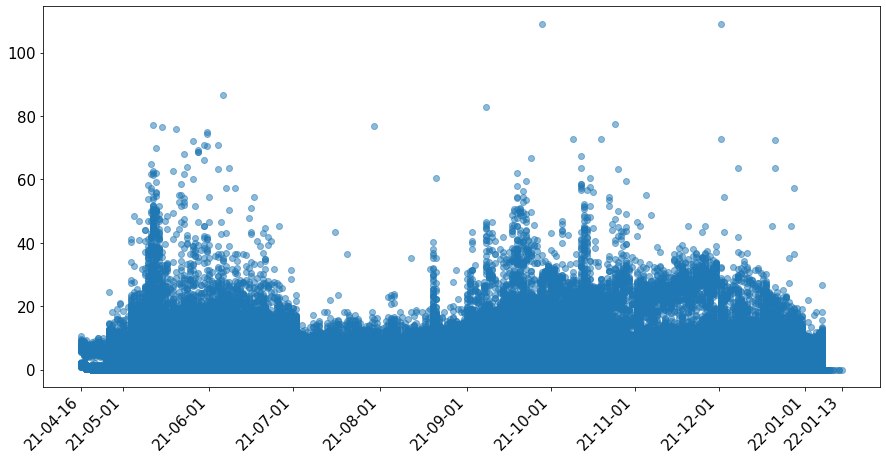

In [62]:
data_temp = data[data["AdType"]=="Banner"]
data_temp = data_temp[data_temp["CountryCode"] == "AP"]
data_temp = data_temp[data_temp["Media"].isin(["DV-GDN", "DV-DSP", "DV-YT"])]

x = data["Date"]
y = data["CPM"]

xtick = [x.min()] + pd.date_range(x.min(), x.max(), freq='MS').strftime("%Y-%m-%d").tolist() + [x.max()]
xlabel = [e[2:] for e in xtick]
# xlabel[0] = x.min()[2:]
# xlabel[-1] = x.max()[2:]

fig, ax = plt.subplots(figsize=(15, 7))

ax.scatter(x, y, alpha=0.5)
ax.set_xticks(ticks=xtick, labels=xlabel, rotation=45, ha="right", fontsize=15)
ax.tick_params(axis='y', labelsize=15)
# set_xyticks를 사용하려면 tick정보를 넣어야 한다. default tick을 사용한 다음 tick에 대한 수정을 할 경우 tick_params 사용.

#$ax.set_xlim(x.min(), x.max())

# ax.set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])

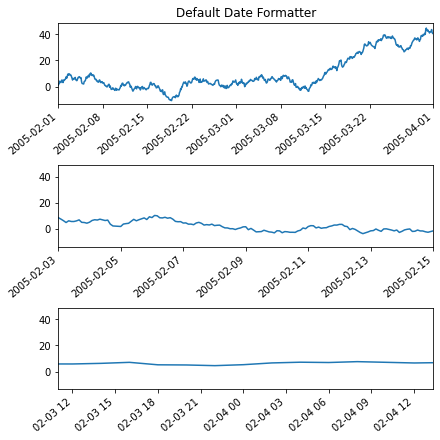

In [60]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

base = datetime.datetime(2005, 2, 1)
dates = [base + datetime.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

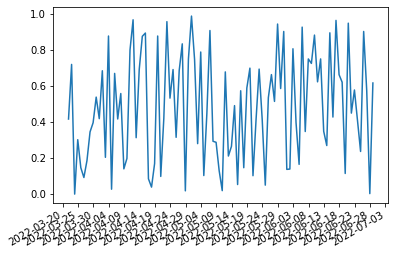

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

np.random.seed(1)

N = 100
y = np.random.rand(N)

now = dt.datetime.now()
then = now + dt.timedelta(days=100)
days = mdates.drange(now,then,dt.timedelta(days=1))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(days,y)
plt.gcf().autofmt_xdate()
plt.show()

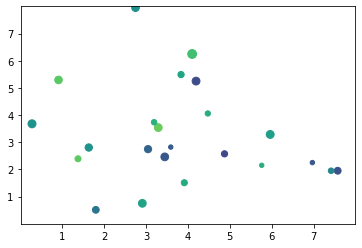

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()